# Lesson 1: Auto-Differentiation and JAX

<br>

<br>

Hi, I am Jay Sandesara. 

I will be giving a very gentle introduction to the use of auto-differentiation techniques using the JAX library. 

The lectures are focused for use in statistical data analysis at HEP experiments like the ATLAS and CMS.















<br>

<br>

I am a final year graduate student at the University of Massachusetts Amherst. 

I especially welcome questions and discussions on any of the topics. It will help both you and me gain a deeper understanding of the subject!

<br>

<br>

Let's begin!

I dont need to tell you that differentiation is used everywhere in physics! Everywhere from classical Newtonian and Lagrangian mechanics to the Schrodinger equations and the theories of relativity - we need to compute derivatives to do physics.


<div>   
    <center>
        <img src="figures/Theory_applications.png" width="1000"/>
    </center>
    </div>
    




<br>

<br>

But that's not all! 

Differentiation is also very imporant for use in statistical tool-sets used to make physics inference in experimental high energy physics.

<br>

<div>   
<center>
        <img src="figures/HEP_applications.png" width="1000"/>
</center>
</div>

<br>

This latter application will be the focus of this set of lectures.

<br>

<br>

Let us start with the most popular statistical tool nowadays - Machine Learning. 

In ML, we typically use differentiation to perform gradient-based optimization of the ML model parameters. For example, we use gradient descent to minimize a loss function $\mathcal{L}(\omega)$. 

Here the $\omega$ refer to the set of tune-able parameters in a ML model, such as the neurons in a Neural Network (NN). Our task is then to find the optimal set of parameter values $\omega$ that minimizes the loss function:

$$\underset{\omega}{\operatorname{argmin}} \mathcal{L}(\omega)$$


<br>

<br>

How do we do this? A commonly used algorithm, called the gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 

The idea is to take repeated steps in the opposite direction of the gradient of the function at the current point, because this is the direction of steepest descent.

<div>
<center>
<img src="figures/func_min.png" width="500"/>
</center>
</div>

$$\vec{\omega}_{i+1} = \vec{\omega}_{i} - \lambda \nabla_\omega \mathcal{L}(\vec{\omega}_i)$$


<br>

<br>

The figure is for a simple example with only one input parameter. 

The number of parameters in a typical NN can range from thousands to billions. 

Time efficient and accurate derivative estimation is thus a very important problem in computing. 

<br>

<br>

## How do we calculate the derivatives using computers?

<br>

Let's start with the human way of doing it. Let's say we have a function

$$f(x) = x^2+5$$

In Python this can be written as

In [1]:
def f(x):
    
    return x**2 + 5

<br>

<br>

We want to calculate the derivative. We simply define another function, that is a derivative of this simple function:


<br>

<br>

In [2]:
def f_prime(x):
    
    return 2*x

<br>

<br>

This is easy, we now have a new Python function that gives us the derivative of $f(x)$ for any value of $x$! 

This way of calculating the derivatives using a computer is known as $\textbf{Manual Differentiation}$, for obvious reasons.

This is commonly used to compute derivatives in theory computations.

While this type of approach is fairly intuitive, it can quickly become tedious for more complicated functions - common in statistics. 

<br>

<br>

Another way we can compute the derivatives is using $\textbf{Numerical Differentiation}$, which uses finite differences to compute the derivatives. 

<br>

<br>

A derivative of a scalar valued function $f(x)$ for an n-dimensional vector $x$ is defined as follows:

$$\frac{\partial f}{\partial x} = \underset{h \rightarrow 0}{\operatorname{lim}} \frac{f(x+h)-f(x)}{h} $$

<br>

<br>

We can update this definition so as to include very small, but non-zero values of h:

$$\frac{\partial f}{\partial x} \approx \frac{f(x+h)-f(x)}{h} $$

In [16]:
def f(x):
    
    return x**2 + 5

def f_prime_man(x):
    
    return 2*x

def f_prime_num(x, h):
    
    return ((f(x+h)) - f(x))/h

<br>

<br>

In [17]:
print(f_prime_num(1.0,1e-5))
print(f_prime_man(1.0))

2.00001000001393
2.0


<br>

<br>

Text(0.5, 0, 'step size')

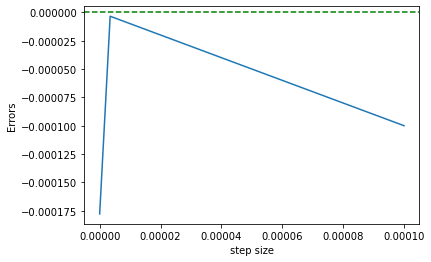

In [24]:
from matplotlib import pyplot as plt
import numpy as np

# Grid of step sizes
scan_h_values = np.linspace(1e-12,1e-4,num=30)

# Evaluate the function at 1.0
ones = np.ones_like(scan_values)

# Error = Manual Diff (Exact) - Numerical Diff (Approx)
error_estimates = f_prime_man(ones) - f_prime_num(ones, scan_h_values) 
        
plt.plot(scan_h_values, error_estimates)
plt.axhline(y = 0.0, color = 'g', linestyle = '--')
plt.ylabel('Errors')
plt.xlabel('step size')

<br>

<br>

An obvious limitation from this approach is the choice of the step size h. 

One needs to balance between the truncation error and the rounding error resulting from the limited precision of the function itself.

But as we saw, these errors can be made minimal for practical statistical purposes.


<br>

<br>

The main limitation of this approach comes from elsewhere. Generalizing the derivative for more than one parameter:
    
$$\frac{\partial f}{\partial x_i} \approx \frac{f(x_i+h e_i)-f(x_i)}{h} $$

We can see how such a derivative requires $n$ individual computations. For ML models, the number of tune-able parameters typically range from thousands to billions, making this method un-feasible in practice.

<br>

<br>

$\textbf{Symbolic Differentiation}$ program can convert a function of our choice into it's respective derivative function, by transforming the function using the standard derivative tools. 

This is essentially an automated version of the Manual Differentiation technique. 

<br>

<div>
<center>
<img src="figures/Sym_Diff.png" width="500"/>
</center>
</div>

<br>

<br>

This might seem like an optimal technique but it suffers from major flaws. One such limitation is known as Expression Swelling. 

What this means is that a function's derivative can turn into a very convoluted expression when written out explicitly. 

<br>

<br>

Let's take an example of the soft ReLU function, commonly used as an activation function in NN models:

$$ \log \left(1.0 + e^{\vec{w}\cdot \vec{x} + \vec{b}} \right) $$

The derivative of this, w.r.t only two parameters is fairly involved:

$$ \frac{e^{b_1+b_2+ w_1 x + w_2 \log \left[ 1 + e^{b_1+w_1 x} \right] } w_2 x}{(1 + e^{b_1+w_1 x})\left(1 + e^{b_2+w_2 \log \left[1 + e^{b_1+w_1 x}\right]}\right)}$$

This is with just two parameters; with thousands of them (as is often typical in a hidden layer in an ML model) this quickly becomes so complex, it is impractical to calculate efficiently. 


<br>

<br>

Moreover, the function passed to a symbolic differentiation program needs to be of a closed form - i.e. we cannot have loops or if/else conditions in the function. 

As we will see in the next lectures, control flow operations are particularly essential in the calculation of Hessian in an experimental analyses.

<br>

<br>

It might seem hopeless than to compute these second derivatives with millions of parameters in a time practical way - and yet we keep seeing NNs with billions of tune-able parameters! 

Enter $\textbf{Automatic Differentiation}$. Rather than produce an expression for the derivative of a function, it calculates directly the exact numerical value of the function and it's derivatives for a given set of input parameters. 

<br>

<br>

To best understand automatic differentiation, it is easiest to start with a simple example. Let's say we want to find the value of the first-order derivative of the following function:

$$f(x_1, x_2) = \left(\frac{x_1}{x_2} - e^{x_2} \right) \cdot \left(sin\left(\frac{x_1}{x_2}\right) + \frac{x_1}{x_2} - e^{x_2}\right)$$

Seems fairly complex, especially if we try to perform manual or symbolic differentiation on this. But with some cleverness we can convert this function into a series of elementary computations. 

<br>

<br>

Let's write the function using Python:

<br>

<br>

In [10]:
# Write the above function as a combination of it's elementary operations

def fn(x1, x2):
    
    a = x1/x2      
    
    b = np.exp(x2)     
    
    c = np.sin(a)
    
    d = a - b
    
    e = c + d
    
    g = d * e
    
    return g

<br>

<br>

Do you see what we did here? Let's plot it out:

<div>
<center>
<img src="figures/forward_pass_nodiff.png" width="1000"/>
    </center>
</div>

We start with the most basic operations involved in the function and then we use these computations to eventually compute the full function value. 

<br>

<br>

This might seem like a simple trick - but together with the chain rule of differentiation, this can be exploited to compute accurate and efficient derivatives of arbitrarily complex functions.

Let's continue with the function above. Let's re-write it as follows:

<br>

<br>

In [28]:
# Write the derivative of the function using chain rule

def fn_prime(x1, x2):
    
    a = x1/x2      
    
    a_prime_x1 = 1/x2                         # Explicitly compute derivative expressions wrt x1 parameter
    
    b = jnp.exp(x2) 
    
    b_prime_x1 = 0
    
    c = jnp.sin(a)
    
    c_prime_x1 = np.cos(a)*a_prime_x1          # Note how we start using the values of previous computations

    d = a - b
    
    d_prime_x1 = a_prime_x1 - b_prime_x1
    
    e = c + d
    
    e_prime_x1 = c_prime_x1 + d_prime_x1 
     
    f = d * e
    
    h_prime_x1 = ( d_prime_x1 * e ) + ( d * e_prime_x1 )
    
    
    return h_prime_x1

<br>

<br>

An auto-differentiation algorithm is in essence doing something very similar! Let's plot it out again:

<div>
    <center>
<img src="figures/forward_pass_diff.png" width="1000"/>
    </center>
</div>

During a so-called forward pass, the auto-diff algorithm calculates and stores the values of each elementary operation and their respective derivatives just like in the function ```fn_prime(x1, x2)``` described in the last slide for example. 


<br>

<br>

One can then easily calculate the value of the derivative wrt ```x1``` or ```x2``` at the specified input value, just as in ```fn_prime(x1, x2)``` defined in the previous slide. (For derivative with ```x2``` we need to do another forward pass)

This is referred to as the forward mode auto-diff to be specific, as opposed to reverse mode auto-diff, but we will get to this distinction in the exercises.

<br>

<br>

Note how we only compute the derivatives of a few basic expressions and then use the chain rule to compute the full derivative using these intermediate values. 

<br>

<br>

We no longer need a blown-up expression for a derivative that does repreated calculations of the same kind - we recycle the values we already calculated once. 

And we no longer need to worry about truncation errors - the computed derivatives are exact!

<br>

<br>

We thus bypass the limitations of both Manual and Symbolic differentiations.

<br>

<br>

These are some of the fundamentals of automatic differentiation, to help you get started. 

You will see more in today's exercise.

<br>

<br>

## What is JAX?

<br>

<br>

JAX has a numpy-like user API for performing array-based computing.

It has the capability to perform something called Composable Function Transformations - transforming our Python and NumPy code to perform automatic differentiation, JIT compilation, parallelization on multi-core hardware, etc.

<br>

$$\text{Python} \rightarrow \text{Intermediate Representation} \rightarrow \text{Transformations}$$

<br>

<br>

As such, JAX is not just a tool for auto-differentiation. It also provides a range of tools for accelerated computation. 

It is built on top of the XLA (Accelerated Linear Algebra) compiler, which allows it to run fast on a variety of hardware platforms, including CPUs, GPUs, and TPUs.



<br>

<br>

One of the key features of JAX includes JIT compilation, which can speed up a piece of code by compiling it just-in-time. 

This can save a lot of time and effort, especially for complex functions with many parameters. 

We will be exploring more on the workings of JAX and of JIT compilation in the next two lectures.

<br>

<br>

For now, let's explore the automatic differentiation capabilities of JAX.

<br>

<br>

We saw how forward auto-differntiation works in practice using the functions ```fn``` and ```fn_prime```. Let us see how JAX handles this function and computes it's derivative.

First let us start with the simpler example:

<br>

<br>

In [25]:
import jax
from jax import numpy as jnp

def f(x):
    
    return jnp.power(x,2)+5       #Note how we replaced the regular numpy with JAX's numpy API



<br>

<br>

As mentioned before, JAX creates intermediate representation of our Python function before execution.

It does so, using a fixed set of $\textit{primitive}$ operations handled by `jax.lax`, e.g. `lax.add`,`lax.sub`, etc. We will explore more of this $\textit{tracing}$ step in the next lecture.

These are exactly the type of elementary operations we used to transform our Python function before!

JAX knows how to perform composable transformations, like `grad`, `jit`, etc on these primitive operations.

<br>

<br>

In [14]:
# Let us check this out. make_jaxpr shows us the intermediate representation performed by JAX

jax.make_jaxpr(f)(1.0)

{ lambda ; a:f32[]. let
    b:f32[] = integer_pow[y=2] a
    c:f32[] = add b 5.0
  in (c,) }

<br>

<br>

In [26]:
# Now let us check out how it performs the gradient under the hood after doing the intermediate representation

#Does the output look familiar?

jax.make_jaxpr(jax.jacfwd(f))(1.0)

{ lambda ; a:f32[]. let
    b:i32[1,1] = iota[dimension=0 dtype=int32 shape=(1, 1)] 
    c:i32[1,1] = add b 0
    d:i32[1,1] = iota[dimension=1 dtype=int32 shape=(1, 1)] 
    e:bool[1,1] = eq c d
    f:f32[1,1] = convert_element_type[new_dtype=float32 weak_type=False] e
    g:f32[1,1] = slice[limit_indices=(1, 1) start_indices=(0, 0) strides=None] f
    h:f32[1] = reshape[dimensions=None new_sizes=(1,)] g
    i:f32[1] = convert_element_type[new_dtype=float32 weak_type=True] h
    j:f32[] = integer_pow[y=2] a
    k:f32[] = integer_pow[y=1] a
    l:f32[] = mul 2.0 k
    m:f32[1] = mul i l
    _:f32[] = add j 5.0
    n:f32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] m
    o:f32[] = reshape[dimensions=None new_sizes=()] n
  in (o,) }

<br>

<br>

Okay, that was intuitive and just what we expected! 

Now let's do this again with the more complicated function that we computed by manual auto-diff earlier. 

<br>

<br>

In [34]:
# Let's see how JAX simplifies our expression with it's computation graph

def fnc_jax(x1, x2):
    
    return (jnp.divide(x1,x2) - jnp.exp(x2))*(jnp.sin(jnp.divide(x1,x2)) + jnp.divide(x1,x2) - jnp.exp(x2))

jax.make_jaxpr(fnc_jax)(1.0,1.0)

{ lambda ; a:f32[] b:f32[]. let
    c:f32[] = div a b
    d:f32[] = exp b
    e:f32[] = sub c d
    f:f32[] = div a b
    g:f32[] = sin f
    h:f32[] = div a b
    i:f32[] = add g h
    j:f32[] = exp b
    k:f32[] = sub i j
    l:f32[] = mul e k
  in (l,) }

<br>

<br>

The `div a b` seems to be repeated three times in the JAX computation.

This is because, as of now, we do not compile it using JIT. So the computation chart follows the way $\textit{you}$ write the function.

Once we do, JIT recognizes and de-duplicates the repeated operations where necessary. We shall explore this in the next lecture.

<br>

<br>

In [3]:
# Let's manually re-write the function to avoid repeated computation for simplicity

def fnc_jax(x1, x2):
    a = jnp.divide(x1,x2)
    b = jnp.exp(x2)
    return (a - b)*(jnp.sin(a) + a - b)

jax.make_jaxpr(fnc_jax)(1.0,1.0)

{ lambda ; a:f32[] b:f32[]. let
    c:f32[] = div a b
    d:f32[] = exp b
    e:f32[] = sub c d
    f:f32[] = sin c
    g:f32[] = add f c
    h:f32[] = sub g d
    i:f32[] = mul e h
  in (i,) }

<br>

<br>

In [29]:
# Let us check if the derivative function we wrote earlier has the same result as JAX's autodiff calculation

print("Manual Gradient Result")
print(fn_prime(1.0,1.0))

print("\n")

print("JAX Gradient Result")
print(jax.grad(fnc_jax)(1.0,1.0))

Manual Gradient Result
-3.523484


JAX Gradient Result
-3.523484


<br>

<br>

In [62]:
# Now let's check if our breakdown of the gradient function matches JAX's computation chart

jax.make_jaxpr(jax.jacfwd(fnc_jax))(1.0,1.0)

{ lambda ; a:f32[] b:f32[]. let
    c:i32[1,1] = iota[dimension=0 dtype=int32 shape=(1, 1)] 
    d:i32[1,1] = add c 0
    e:i32[1,1] = iota[dimension=1 dtype=int32 shape=(1, 1)] 
    f:bool[1,1] = eq d e
    g:f32[1,1] = convert_element_type[new_dtype=float32 weak_type=False] f
    h:f32[1,1] = slice[limit_indices=(1, 1) start_indices=(0, 0) strides=None] g
    i:f32[1] = reshape[dimensions=None new_sizes=(1,)] h
    j:f32[1] = convert_element_type[new_dtype=float32 weak_type=True] i
    k:f32[] = div a b
    l:f32[1] = div j b
    m:f32[] = exp b
    n:f32[] = sub k m
    o:f32[] = sin k
    p:f32[] = cos k
    q:f32[1] = mul l p
    r:f32[] = add o k
    s:f32[1] = add q l
    t:f32[] = sub r m
    _:f32[] = mul n t
    u:f32[1] = mul l t
    v:f32[1] = mul n s
    w:f32[1] = add_any u v
    x:f32[1] = slice[limit_indices=(1,) start_indices=(0,) strides=None] w
    y:f32[] = reshape[dimensions=None new_sizes=()] x
  in (y,) }

<br>

<br>

You may compare this to our manual implementation `fn_prime(x1, x2)` of forward mode auto differentiation and see the similarities!

<br>

<br>

You saw the differences between imperative, functional and array oriented programming in Jim's lecture.

JAX uses a functional programming paradigm.

This means we can pass the output of the gradient of a function to another gradient function, and in this manner compute any n-th order derivative. 

<br>

<br>

In [15]:
print("Second order derivative")
print(np.array(  jax.jacfwd(
                 jax.jacfwd(fnc_jax, argnums=(0,1)), 
                                     argnums=(0,1))
                 (1.0,1.0)
              )
     )

print("\n")

print("Third order derivative")
print(np.array( jax.jacfwd(
                jax.jacfwd(
                jax.jacfwd(fnc_jax, argnums=(0,1)), 
                                    argnums=(0,1)), 
                                    argnums=(0,1))
                (1.0,1.0)
              )
     )

Second order derivative
[[ 4.526489  -7.908262 ]
 [-7.9082613 33.122337 ]]


Third order derivative
[[[-1.5960214 -5.1696005]
  [-5.169601  11.793512 ]]

 [[-5.1696005 11.793512 ]
  [11.793512  33.112816 ]]]


<br>

<br>

That's all for today's lecture! 

In the next one we will explore more of how JAX performs tracing of the function to decompose into primitive operations, and then see how JIT compilation can speed up execution of the code!

Let's move to the hands-on exercise!